In [2730]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import random

## 0、数据处理成csv形式

In [2731]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
          'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', 'income']
df_train_set = pd.read_csv('./adult.data', names=columns)
df_test_set = pd.read_csv('./adult.test', names=columns, skiprows=1) #第一行是非法数据

print(df_train_set.head())
print(df_test_set.head())
df_train_set.to_csv('./train_adult.csv', index=False)
df_test_set.to_csv('./test_adult.csv', index=False)

   age          workclass  fnlwgt   education  educationNum  \
0   39          State-gov   77516   Bachelors            13   
1   50   Self-emp-not-inc   83311   Bachelors            13   
2   38            Private  215646     HS-grad             9   
3   53            Private  234721        11th             7   
4   28            Private  338409   Bachelors            13   

         maritalStatus          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capitalGain  capitalLoss  hoursPerWeek   nativeCountry  income  
0         2174            0            40   United-States   <=50K  
1         

In [2732]:
df_test_set.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [2733]:
len(df_train_set), len(df_test_set), len(df_test_set.columns)

(32561, 16281, 15)

## 1、数据读取

In [2734]:
df_train_set = pd.read_csv('./train_adult.csv')
df_test_set = pd.read_csv('./test_adult.csv')
df_train_set, df_test_set

(       age          workclass  fnlwgt    education  educationNum  \
 0       39          State-gov   77516    Bachelors            13   
 1       50   Self-emp-not-inc   83311    Bachelors            13   
 2       38            Private  215646      HS-grad             9   
 3       53            Private  234721         11th             7   
 4       28            Private  338409    Bachelors            13   
 ...    ...                ...     ...          ...           ...   
 32556   27            Private  257302   Assoc-acdm            12   
 32557   40            Private  154374      HS-grad             9   
 32558   58            Private  151910      HS-grad             9   
 32559   22            Private  201490      HS-grad             9   
 32560   52       Self-emp-inc  287927      HS-grad             9   
 
              maritalStatus          occupation    relationship    race  \
 0            Never-married        Adm-clerical   Not-in-family   White   
 1       Married-civ

## 2、数据预处理

### 2.1 删除对应属性

In [2735]:
df_train_set.drop(['fnlwgt', 'educationNum'], axis=1, inplace=True) # fnlwgt列用处不大，educationNum与education类似
df_test_set.drop(['fnlwgt', 'educationNum'], axis=1, inplace=True)
print(list(df_train_set.columns) == list(df_test_set.columns))

True


### 2.2 重复行记录处理

In [2736]:
df_train_set.drop_duplicates(inplace=True) # 去除重复行
df_test_set.drop_duplicates(inplace=True)
df_train_set, df_test_set

(       age          workclass      education        maritalStatus  \
 0       39          State-gov      Bachelors        Never-married   
 1       50   Self-emp-not-inc      Bachelors   Married-civ-spouse   
 2       38            Private        HS-grad             Divorced   
 3       53            Private           11th   Married-civ-spouse   
 4       28            Private      Bachelors   Married-civ-spouse   
 ...    ...                ...            ...                  ...   
 32554   53            Private        Masters   Married-civ-spouse   
 32555   22            Private   Some-college        Never-married   
 32556   27            Private     Assoc-acdm   Married-civ-spouse   
 32558   58            Private        HS-grad              Widowed   
 32560   52       Self-emp-inc        HS-grad   Married-civ-spouse   
 
                occupation    relationship    race      sex  capitalGain  \
 0            Adm-clerical   Not-in-family   White     Male         2174   
 1    

### 2.3 缺失值处理

In [2737]:
df_train_set[df_train_set.isna().values == True] # 输出有缺失值的数据行

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income


In [2738]:
df_test_set[df_test_set.isna().values == True]

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income


In [2739]:
df_train_set.dropna(inplace=True) # 去除空行 
df_test_set.dropna(inplace=True)

### 2.4 查看列类型

In [2740]:
df_train_set.dtypes, df_test_set.dtypes

(age               int64
 workclass        object
 education        object
 maritalStatus    object
 occupation       object
 relationship     object
 race             object
 sex              object
 capitalGain       int64
 capitalLoss       int64
 hoursPerWeek      int64
 nativeCountry    object
 income           object
 dtype: object,
 age               int64
 workclass        object
 education        object
 maritalStatus    object
 occupation       object
 relationship     object
 race             object
 sex              object
 capitalGain       int64
 capitalLoss       int64
 hoursPerWeek      int64
 nativeCountry    object
 income           object
 dtype: object)

### 2.5 异常值处理

In [2741]:
df_train_set[df_train_set['workclass'].str.contains(r'\?', regex=True)] # 查找异常值, 避免与正则表达式的?冲突需要转义

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
27,54,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,Some-college,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,10th,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,10th,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,HS-grad,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [2742]:
df_test_set[df_test_set['workclass'].str.contains(r'\?', regex=True)]

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
6,29,?,HS-grad,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
13,58,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K.
22,72,?,7th-8th,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K.
35,65,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,21,?,Some-college,Never-married,?,Other-relative,White,Female,0,0,52,United-States,<=50K.
16121,61,?,Some-college,Married-civ-spouse,?,Husband,White,Male,0,0,14,United-States,<=50K.
16239,73,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,0,0,25,Canada,<=50K.
16251,81,?,Assoc-voc,Married-civ-spouse,?,Husband,White,Male,2936,0,20,United-States,<=50K.


In [2743]:
df_train_set=df_train_set[~df_train_set['workclass'].str.contains(r'\?', regex=True)]
df_train_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [2744]:
df_test_set=df_test_set[~df_test_set['workclass'].str.contains(r'\?', regex=True)]
df_test_set

,age,workclass,education,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
16276,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16278,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [2745]:
#删除有异常值的行
new_columns = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
               'nativeCountry', 'income']
for col in new_columns:
        df_train_set = df_train_set[~df_train_set[col].str.contains(r'\?', regex=True)]
        df_test_set = df_test_set[~df_test_set[col].str.contains(r'\?', regex=True)]
df_train_set.head(), df_test_set.head()

(   age          workclass   education        maritalStatus  \
 0   39          State-gov   Bachelors        Never-married   
 1   50   Self-emp-not-inc   Bachelors   Married-civ-spouse   
 2   38            Private     HS-grad             Divorced   
 3   53            Private        11th   Married-civ-spouse   
 4   28            Private   Bachelors   Married-civ-spouse   
 
            occupation    relationship    race      sex  capitalGain  \
 0        Adm-clerical   Not-in-family   White     Male         2174   
 1     Exec-managerial         Husband   White     Male            0   
 2   Handlers-cleaners   Not-in-family   White     Male            0   
 3   Handlers-cleaners         Husband   Black     Male            0   
 4      Prof-specialty            Wife   Black   Female            0   
 
    capitalLoss  hoursPerWeek   nativeCountry  income  
 0            0            40   United-States   <=50K  
 1            0            13   United-States   <=50K  
 2            0   

### 2.6 数据可视化

<AxesSubplot:ylabel='Frequency'>

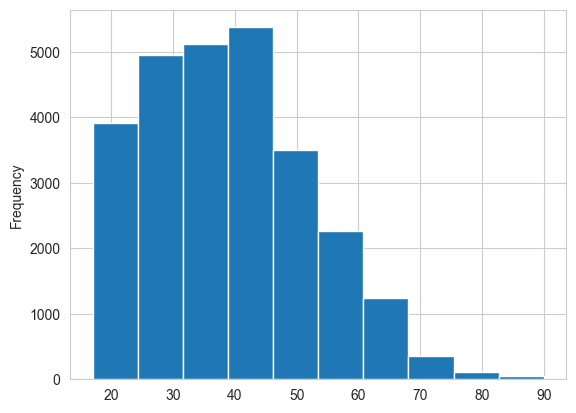

In [2746]:
df_train_set['age'].plot.hist()

<AxesSubplot:>

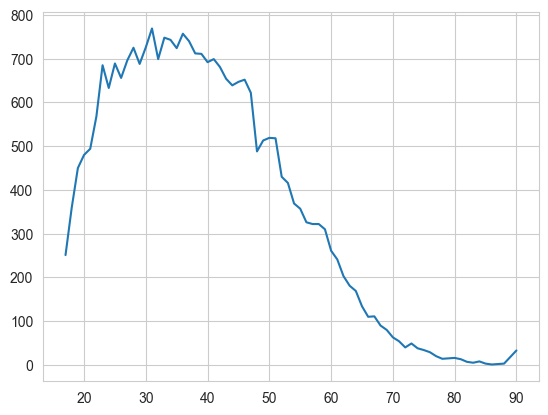

In [2747]:
df_train_set['age'].value_counts().sort_index().plot.line()

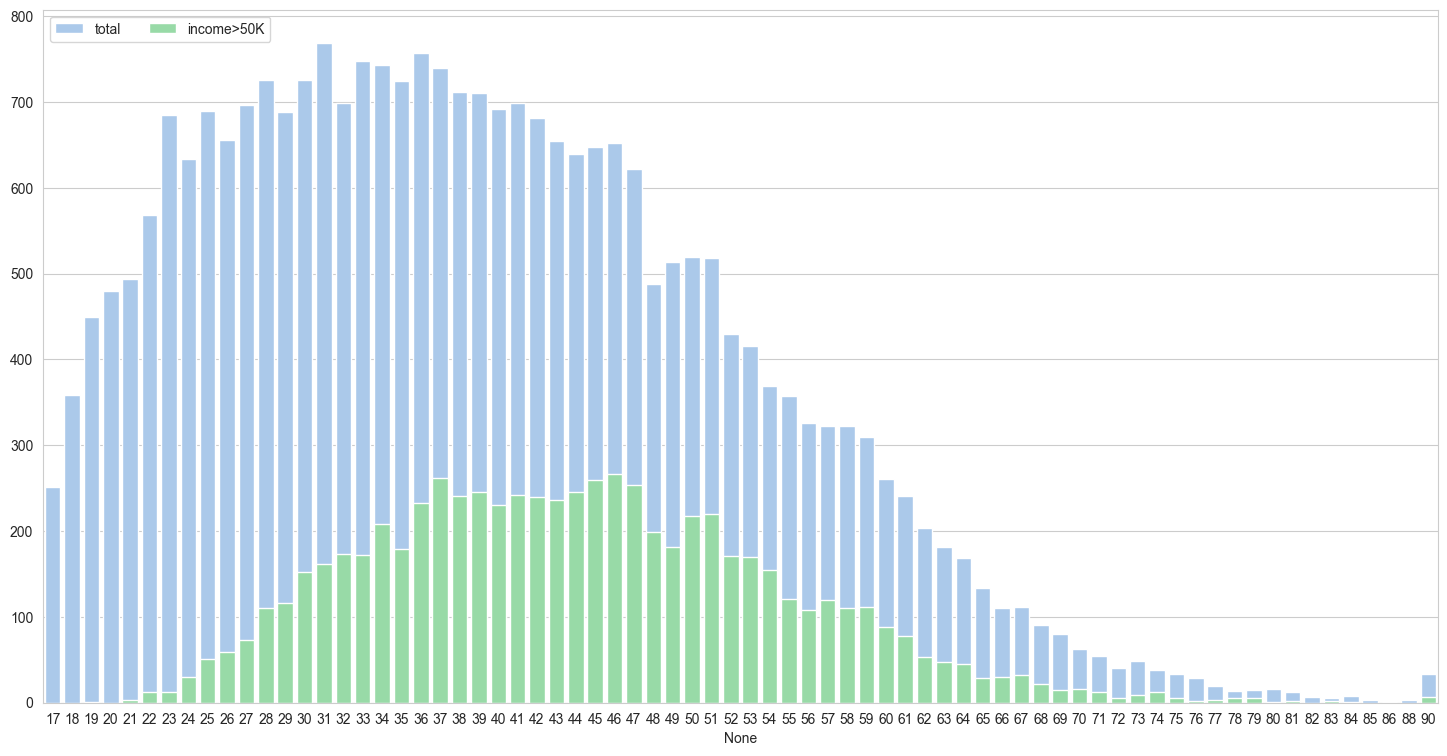

In [2748]:
# 画出年龄与收入的关系

df_train_set = df_train_set.reset_index(drop=True) #重置索引
df_train_set['age'].isnull() == True
s=df_train_set['age'].value_counts()
k=df_train_set['age'][df_train_set['income']==' >50K'].value_counts()
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(18, 9))
sns.set_color_codes("pastel")
sns.barplot(x=s.index,y=s.values,label='total',color="b")
sns.barplot(x=k.index,y=k.values,label='income>50K',color="g")
ax.legend(ncol=2, loc="upper left", frameon=True)

<AxesSubplot:>

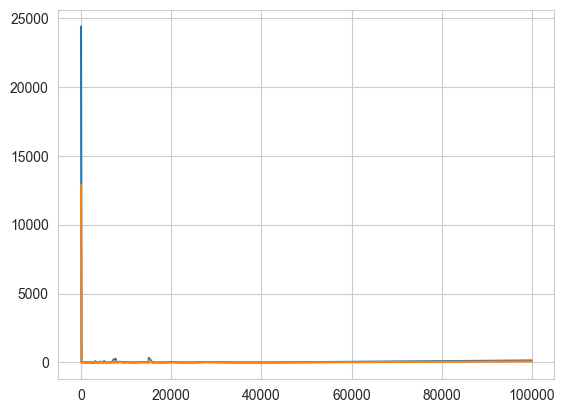

In [2749]:
# capitalGain
df_train_set['capitalGain'].value_counts().sort_index().plot.line()
df_test_set['capitalGain'].value_counts().sort_index().plot.line()

<AxesSubplot:>

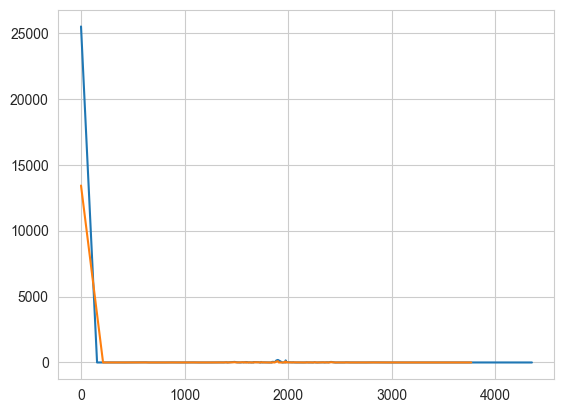

In [2750]:
# capitalLoss
df_train_set['capitalLoss'].value_counts().sort_index().plot.line()
df_test_set['capitalLoss'].value_counts().sort_index().plot.line()

<AxesSubplot:>

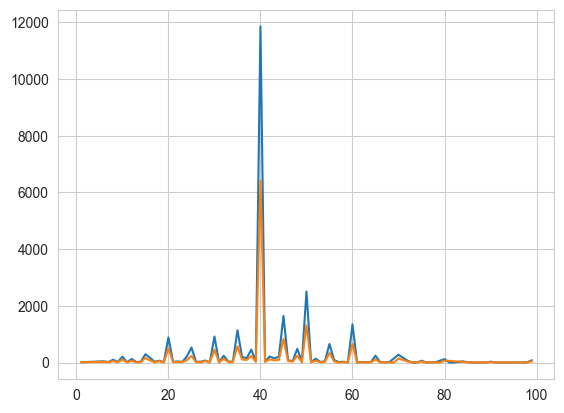

In [2751]:
# hoursPerWeek
df_train_set['hoursPerWeek'].value_counts().sort_index().plot.line()
df_test_set['hoursPerWeek'].value_counts().sort_index().plot.line()


### 2.7 连续型变量处理

In [2752]:
continuous_column = ['age', 'capitalGain', 'capitalLoss', 'hoursPerWeek']

In [2753]:
df_train_set['age'].max(), df_train_set['age'].min(), df_test_set['age'].max(), df_test_set['age'].min()

(90, 17, 90, 17)

In [2754]:
df_train_set['age'].head() 

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [2755]:
bins = [0, 25, 50, 75, 100] # 分箱区间左开右闭 (0, 25], (25, 50], ...
df_train_set['age'] = pd.cut(df_train_set['age'], bins, labels=False)
df_test_set['age'] = pd.cut(df_test_set['age'], bins, labels=False)

In [2756]:
# 年龄区间独热编码
df_train_set = pd.get_dummies(df_train_set, columns=['age'])
df_test_set = pd.get_dummies(df_test_set, columns=['age'])

In [2757]:
# 删除capitalGain和capitalLoss列
df_train_set.drop(['capitalGain', 'capitalLoss'], axis=1, inplace=True)
df_test_set.drop(['capitalGain', 'capitalLoss'], axis=1, inplace=True)
df_train_set.head(), df_test_set.head()

(           workclass   education        maritalStatus          occupation  \
 0          State-gov   Bachelors        Never-married        Adm-clerical   
 1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
 2            Private     HS-grad             Divorced   Handlers-cleaners   
 3            Private        11th   Married-civ-spouse   Handlers-cleaners   
 4            Private   Bachelors   Married-civ-spouse      Prof-specialty   
 
      relationship    race      sex  hoursPerWeek   nativeCountry  income  \
 0   Not-in-family   White     Male            40   United-States   <=50K   
 1         Husband   White     Male            13   United-States   <=50K   
 2   Not-in-family   White     Male            40   United-States   <=50K   
 3         Husband   Black     Male            40   United-States   <=50K   
 4            Wife   Black   Female            40            Cuba   <=50K   
 
    age_0  age_1  age_2  age_3  
 0      0      1      0      0  


In [2758]:
bins = [0, 30, 60, 90, 120]
df_train_set['hoursPerWeek'] = pd.cut(df_train_set['hoursPerWeek'], bins, labels=False)
df_test_set['hoursPerWeek'] = pd.cut(df_test_set['hoursPerWeek'], bins, labels=False)

df_train_set = pd.get_dummies(df_train_set, columns=['hoursPerWeek'])
df_test_set = pd.get_dummies(df_test_set, columns=['hoursPerWeek'])

In [2759]:
df_train_set.head(), df_test_set.head()

(           workclass   education        maritalStatus          occupation  \
 0          State-gov   Bachelors        Never-married        Adm-clerical   
 1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
 2            Private     HS-grad             Divorced   Handlers-cleaners   
 3            Private        11th   Married-civ-spouse   Handlers-cleaners   
 4            Private   Bachelors   Married-civ-spouse      Prof-specialty   
 
      relationship    race      sex   nativeCountry  income  age_0  age_1  \
 0   Not-in-family   White     Male   United-States   <=50K      0      1   
 1         Husband   White     Male   United-States   <=50K      0      1   
 2   Not-in-family   White     Male   United-States   <=50K      0      1   
 3         Husband   Black     Male   United-States   <=50K      0      0   
 4            Wife   Black   Female            Cuba   <=50K      0      1   
 
    age_2  age_3  hoursPerWeek_0  hoursPerWeek_1  hoursPerWeek_2  

### 2.8 离散型变量处理

In [2760]:
discrete_column = ['workclass', 'education', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'nativeCountry', 'income']

In [2761]:
df_train_set['workclass'].value_counts()

 Private             19214
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64

In [2762]:
df_train_set['workclass'].head() #展示前五条

0            State-gov
1     Self-emp-not-inc
2              Private
3              Private
4              Private
Name: workclass, dtype: object

In [2763]:
for col in discrete_column:
    print(col, df_train_set[col].value_counts().keys(), end='\n\n')

workclass Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay'],
      dtype='object')

education Index([' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc',
       ' Assoc-acdm', ' 11th', ' 10th', ' 7th-8th', ' Prof-school', ' 9th',
       ' Doctorate', ' 12th', ' 5th-6th', ' 1st-4th', ' Preschool'],
      dtype='object')

maritalStatus Index([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype='object')

occupation Index([' Prof-specialty', ' Exec-managerial', ' Adm-clerical', ' Craft-repair',
       ' Sales', ' Other-service', ' Machine-op-inspct', ' Transport-moving',
       ' Handlers-cleaners', ' Farming-fishing', ' Tech-support',
       ' Protective-serv', ' Priv-house-serv', ' Armed-Forces'],
      dtype='object')

relationship Index([' Husband', ' Not-in-family', ' Own-child', ' Unmarried', ' Wife'

In [2764]:
# ' United-States', ' Mexico', ' Philippines', ' Germany', ' Puerto-Rico',
#      ' Canada', ' El-Salvador', ' India', ' Cuba', ' England', ' Jamaica',
#      ' South', ' Italy', ' China', ' Dominican-Republic', ' Vietnam',
#      ' Guatemala', ' Japan', ' Columbia', ' Poland', ' Haiti', ' Taiwan',
#      ' Iran', ' Portugal', ' Nicaragua', ' Peru', ' Greece', ' France',
#      ' Ecuador', ' Ireland', ' Hong', ' Cambodia', ' Trinadad&Tobago',
#      ' Laos', ' Thailand', ' Yugoslavia', ' Outlying-US(Guam-USVI-etc)',
#      ' Hungary', ' Honduras', ' Scotland', ' Holand-Netherlands'          按照发达国家和发展中国家分
developed_country = [' United-States', ' Germany', ' Canada', ' England', ' South', ' Italy', ' Japan', ' Poland', ' Taiwan', ' Portugal', ' Greece', ' France', ' Ireland', ' Hong', ' Scotland', ' Holand-Netherlands']
developing_country = [' China', ' Mexico', ' Philippines', ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba', ' Jamaica', ' Dominican-Republic', ' Vietnam', ' Guatemala', ' Columbia', ' Haiti', ' Iran', ' Nicaragua', ' Peru', ' Ecuador', ' Cambodia', ' Trinadad&Tobago', ' Laos', ' Thailand', ' Yugoslavia', ' Outlying-US(Guam-USVI-etc)', ' Hungary', ' Honduras']
df_train_set['nativeCountry'].replace(developed_country, 'developed', inplace=True)
df_train_set['nativeCountry'].replace(developing_country, 'developing', inplace=True)
df_test_set['nativeCountry'].replace(developed_country, 'developed', inplace=True)
df_test_set['nativeCountry'].replace(developing_country, 'developing', inplace=True)


In [2765]:
edcation_map = {' Preschool':0, ' 1st-4th':0, ' 5th-6th':1, ' 7th-8th':1, ' 9th':1, ' 10th':2, ' 11th':2, ' 12th':2, ' HS-grad':2, ' Some-college':3, ' Assoc-voc':3, ' Assoc-acdm':3, ' Bachelors':4, ' Masters':5, ' Prof-school':6, ' Doctorate':6}
df_train_set['education'] = df_train_set['education'].map(edcation_map)
df_test_set['education'] = df_test_set['education'].map(edcation_map)

In [2766]:
# discrete_column离散型特征转换为one-hot编码
discrete_column_no_income = discrete_column.copy()
discrete_column_no_income.remove('income')
df_train_set = pd.get_dummies(df_train_set, columns=discrete_column_no_income)
df_test_set = pd.get_dummies(df_test_set, columns=discrete_column_no_income)
df_train_set.head()

,income,age_0,age_1,age_2,age_3,hoursPerWeek_0,hoursPerWeek_1,hoursPerWeek_2,hoursPerWeek_3,workclass_ Federal-gov,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,nativeCountry_developed,nativeCountry_developing
0,<=50K,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,<=50K,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,<=50K,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,<=50K,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,<=50K,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [2767]:
df_test_set.head()

,income,age_0,age_1,age_2,age_3,hoursPerWeek_0,hoursPerWeek_1,hoursPerWeek_2,hoursPerWeek_3,workclass_ Federal-gov,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,nativeCountry_developed,nativeCountry_developing
0,<=50K.,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,<=50K.,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,>50K.,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,>50K.,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
5,<=50K.,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [2768]:
# 将income转换为0, 1
df_train_set['income'] = df_train_set['income'].map({' <=50K': 0, ' >50K': 1})
df_test_set['income'] = df_test_set['income'].map({' <=50K.': 0, ' >50K.': 1})

In [2769]:
# 训练集和测试集列是否相同
print(list(df_train_set.columns), end='\n')
print(list(df_test_set.columns), end='\n')

['income', 'age_0', 'age_1', 'age_2', 'age_3', 'hoursPerWeek_0', 'hoursPerWeek_1', 'hoursPerWeek_2', 'hoursPerWeek_3', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_0', 'education_1', 'education_2', 'education_3', 'education_4', 'education_5', 'education_6', 'maritalStatus_ Divorced', 'maritalStatus_ Married-AF-spouse', 'maritalStatus_ Married-civ-spouse', 'maritalStatus_ Married-spouse-absent', 'maritalStatus_ Never-married', 'maritalStatus_ Separated', 'maritalStatus_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tec

In [2770]:
print(df_train_set.shape, df_test_set.shape)

(26904, 59) (14130, 59)


In [2788]:
df_train_set.head()

,income,age_0,age_1,age_2,age_3,hoursPerWeek_0,hoursPerWeek_1,hoursPerWeek_2,hoursPerWeek_3,workclass_ Federal-gov,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,nativeCountry_developed,nativeCountry_developing
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1


## 3. 构造决策树，进行训练

In [2771]:
class TreeNode:
    def __init__(self, dataset, left, right, feature_name, feature_value, label):
        self.dataset = dataset
        self.left = left
        self.right = right
        self.feature_name = feature_name
        self.feature_value = feature_value
        self.label = label

In [2772]:
def calc_gini(df):
    """
    计算数据集的基尼指数
    :param df: 数据集
    :return: 基尼指数
    """
    val_list = pd.unique(df)
    gini = 1
    df = np.array(df)
    for val in val_list:
        p = df[df == val].size / df.size
        gini -= p**2
    return gini  



def split_dataset(df, index, value):
    """
    按照给定的列划分数据集
    :param df: 原始数据集
    :param index: 指定特征的列索引，即feature
    :param value: 指定特征的值
    :return: 切分后的数据集
    """
    
    # 划分数据集
    left = df[df[index] == value]
    right = df[df[index] != value]
    
    # 删除划分后的数据集中的特征列
    left = left.drop(index, axis=1)
    right = right.drop(index, axis=1)

    return left, right
    
    
def choose_best_feature_to_split(df, flags):
    """
    选择最好的特征进行分裂
    :param df: 数据集
    :return: best_value:(分裂特征的index, 特征的值), best_df:(分裂后的左右子树数据集), best_gain:(选择该属性分裂的最大信息增益), best_feature_value:(分裂特征的值)
    """
    
    best_feature = None
    best_split_value = None
    best_gain = 0
    best_feature_value = None

    base_gini_index = calc_gini(df["income"])

    for feature in df.columns:
        if flags[columns.index(feature)] == 1:
            continue
        
        for value in df[feature].unique():
            left_df, right_df = split_dataset(df, feature, value)
            gini_index = calc_gini(left_df[:]["income"]) + calc_gini(right_df[:]["income"])
            gain = gini_index - base_gini_index
            if  gain > best_gain:
                best_feature = feature
                best_split_value = (left_df, right_df)
                best_gain = gain
                best_feature_value = value
    
    return best_feature, best_split_value, best_gain, best_feature_value
    
    


def build_decision_tree(df, columns, flags):
    """
    构建CART树
    :param df: 数据集
    :param columns: 特征列表
    :param flags: 区分特征是否被完全区分开,初始为全0, 若某个特征被区分开那么flags对应的下标为0
    :return: CART树
    """
    
    # 递归结束情况1: 若当前集合的所有样本标签相等,即样本已被分"纯",则可以返回该标签值作为一个叶子节点
    # 递归结束情况2: 若当前训练集的所有特征都被使用完毕,当前无可用特征但样本仍未分"纯"，则返回样本最多的标签作为结果
    flags[columns.index('income')] = 1
    if df.shape[0] == 0:
        return TreeNode(df, None, None, 'income', None, -1)
    if (len(df['income'].unique()) == 1) or (sum(flags) == len(columns)):
        return TreeNode(df, None, None, 'income', None, df['income'].value_counts().keys()[0])
    
    best_feature, best_split_value, best_gain, best_feature_value = choose_best_feature_to_split(df, flags)
    if best_gain > 0:
        flags[columns.index(best_feature)] = 1
        left = build_decision_tree(best_split_value[0], columns, flags)
        right = build_decision_tree(best_split_value[1], columns, flags)
        return TreeNode(df, left, right, best_feature, best_feature_value, None)  
    else:
        return TreeNode(df, None, None, 'income', None, df['income'].value_counts().keys()[0])

    



    
    
def save_decision_tree(cart):
    """
    决策树的存储
    :param cart: 训练好的决策树
    :return: void
    """
    np.save('cart.npy', cart)
    
    
def load_decision_tree():
    """
    决策树的加载
    :return: 保存的决策树
    """    
    
    cart = np.load('cart.npy', allow_pickle=True)
    return cart.item()


In [2773]:
df_train = df_train_set.copy() #防止预处理重新来

In [2774]:
columns = df_train.columns.to_list()
flags = [0 for i in range(len(columns))]

In [2775]:
df_train.head()

,income,age_0,age_1,age_2,age_3,hoursPerWeek_0,hoursPerWeek_1,hoursPerWeek_2,hoursPerWeek_3,workclass_ Federal-gov,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,nativeCountry_developed,nativeCountry_developing
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1


In [2776]:
cart = build_decision_tree(df_train, columns, flags)
save_decision_tree(cart)

## 4. 评估

In [2777]:
def classify(cart, df_row, columns):
    """
    用训练好的决策树进行分类
    :param cart:决策树模型
    :param df_row: 一条测试样本
    :param columns: 特征列表
    :return: 预测结果
    """
    if cart.label != None:
        return cart.label

    else:
        if df_row[columns.index(cart.feature_name)] == cart.feature_value:
            return classify(cart.left, df_row, columns)
        else:
            return classify(cart.right, df_row, columns)
    


def predict(cart, df, columns):
    """
    用训练好的决策树进行分类
    :param cart:决策树模型
    :param df: 所有测试集
    :param columns: 特征列表
    :return: 预测结果
    """
    pred_list = []
    for i in range(len(df)):
        pred_label = classify(cart, df.iloc[i,:], columns)
        if pred_label == -1:
            pred_label = random.randint(0, 1) # 防止classify执行到返回-1,但一般不会执行到返回-1
        pred_list.append(pred_label)
    return pred_list

def calc_acc(pred_list, test_list):
    """
    返回预测准确率
    :param pred_list: 预测列表
    :param test_list: 测试列表
    :return: 准确率
    """
    pred = np.array(pred_list)
    test = np.array(test_list)
    acc = np.sum(pred == test) / len(test_list)
    return acc

## 5. Demo

#### (1) 下面只是测试模型能不能跑通,实际操作时需要用测试集进行评估
#### (2) 此外，测试集应该需要做和训练集一样的预处理操作

In [2778]:
columns = df_train.columns.to_list()

In [2779]:
cart = load_decision_tree() # 加载模型

In [2780]:
cart.feature_name, cart.feature_value, cart.left

('maritalStatus_ Married-AF-spouse', 0, <__main__.TreeNode at 0x29509108310>)

In [2781]:
test_list = df_train['income'].to_numpy()
pred_list = predict(cart, df_train, columns)

In [2782]:
acc_train = calc_acc(pred_list, test_list)
print(acc_train)

0.7511150758251561


In [2783]:
test_list = df_test_set['income'].to_numpy()
pred_list = predict(cart, df_test_set, columns)

In [2784]:
pred_list.count(0), pred_list.count(1)

(12776, 1354)

In [2785]:
acc_test = calc_acc(pred_list, test_list)
print(acc_test)

0.7551309271054494


In [2786]:
# 在test上第一列增加一列预测值
df_test_set.insert(0, 'pred', pred_list)
df_test_set

,pred,income,age_0,age_1,age_2,age_3,hoursPerWeek_0,hoursPerWeek_1,hoursPerWeek_2,hoursPerWeek_3,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,nativeCountry_developed,nativeCountry_developing
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
5,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
16276,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
16278,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
16279,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [2787]:
# 保存预测结果
df_test_set.to_csv('./test_pred.csv', index=False)